In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
plot_params = {
    'text.latex.preamble' : r'\usepackage{amsmath}',
    'text.usetex'         : True,
    'font.family'         : 'sans-serif',
    'font.sans-serif'     : ['Helvetica']   
}
plt.rcParams.update(plot_params)
from matplotlib import cm
from scipy.optimize import brentq
from scipy.misc import derivative

# Problem 1

In [ ]:
x = sp.symbols('x',real=True)
V = sp.symbols('V',real=True,positive=True)
n = sp.symbols('n',integer=True,positive=True)

A0 = 1/2/sp.pi*(sp.integrate(V,(x,0,sp.pi/2)) + sp.integrate(-V,(x,sp.pi/2,sp.pi)) + sp.integrate(V,(x,-sp.pi,-sp.pi/2)) + sp.integrate(-V,(x,-sp.pi/2,0)))
display(A0)

cos = sp.cos(n*x)
An = 1/sp.pi*(sp.integrate(V*cos,(x,0,sp.pi/2)) + sp.integrate(-V*cos,(x,sp.pi/2,sp.pi)) + sp.integrate(V*cos,(x,-sp.pi,-sp.pi/2)) + sp.integrate(-V*cos,(x,-sp.pi/2,0)))
display(An)

sin = sp.sin(n*x)
Bn = 1/sp.pi*(sp.integrate(V*sin,(x,0,sp.pi/2)) + sp.integrate(-V*sin,(x,sp.pi/2,sp.pi)) + sp.integrate(V*sin,(x,-sp.pi,-sp.pi/2)) + sp.integrate(-V*sin,(x,-sp.pi/2,0)))
Bn.simplify()

# Problem 2

In [25]:
x = sp.symbols('x',real=True)
V1,V2 = sp.symbols('V_1 V_2',real=True)
n = sp.symbols('n',integer=True,positive=True)

A0 = 1/sp.S(2)/sp.pi*(sp.integrate(V1,(x,0,sp.pi)) + sp.integrate(V2,(x,-sp.pi,0)))
display(A0.simplify())

cos = sp.cos(n*x)
An = 1/sp.pi*(sp.integrate(V1*cos,(x,-sp.pi/2,sp.pi/2)) + sp.integrate(V2*cos,(x,sp.pi/2,3*sp.pi/2)))
display(An.subs(n,2*n+1).simplify())

sin = sp.sin(n*x)
Bn = 1/sp.pi*(sp.integrate(V1*sin,(x,-sp.pi/2,sp.pi/2)) + sp.integrate(V2*sin,(x,sp.pi/2,3*sp.pi/2)))
Bn.subs(n,2*n).simplify()

V_1/2 + V_2/2

2*(-1)**n*(V_1 - V_2)/(pi*(2*n + 1))

0

In [3]:
display(Bn.subs(n,4*n))
display(Bn.subs(n,4*n+1))
display(Bn.subs(n,4*n+2))
display(Bn.subs(n,4*n+3))

0

0

8*V/(pi*(4*n + 2))

0

In [4]:
t = np.linspace(-0.7,0.7)
x,y = np.meshgrid(t,t)
Z = np.arctan(4*x*y*(x**2+y**2)/(1-(x**2+y**2)**2))*2/np.pi

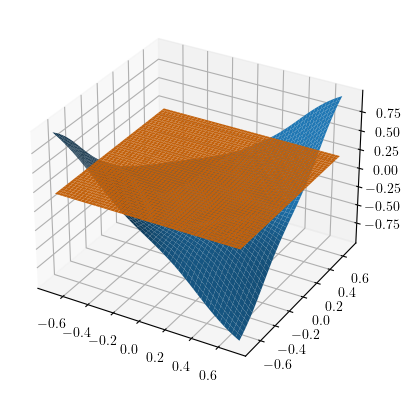

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x, y, Z)
ax.plot_surface(x,y,np.ones(Z.shape)*0.2)

plt.show()

In [15]:
def _get_y(x1,r):
    temp = np.tan(np.pi*r/2)
    return brentq(lambda x2: 4*x1*x2*(x1**2+x2**2) - temp*(1-(x1**2+x2**2)**2), -1,1)

def get_lcurve(r):
    t  = np.linspace(-1,1,1000)
    xy = []
    for _ in t:
        try:
            y = _get_y(_,r)
            xy.append([_,y])
        except:
            pass

    xy = np.array(xy)
    x,y = xy.T
    return x,y

In [91]:
x1,x2 = sp.symbols('x1 x2',real=True)
Phi   = sp.atan(4*x1*x2*(x1**2+x2**2)/(1-(x1**2+x2**2)**2))
E_x = -Phi.diff(x1).simplify()
E_y = -Phi.diff(x2).simplify()
def get_E(x,y):
    Ex = sp.lambdify((x1,x2),E_x,'numpy')(x,y)#derivative(lambda t: Phi(t,y),x,dx=dx)
    Ey = sp.lambdify((x1,x2),E_y,'numpy')(x,y)#derivative(lambda t: Phi(x,t),y,dx=dx)
    return np.array([Ex,Ey])

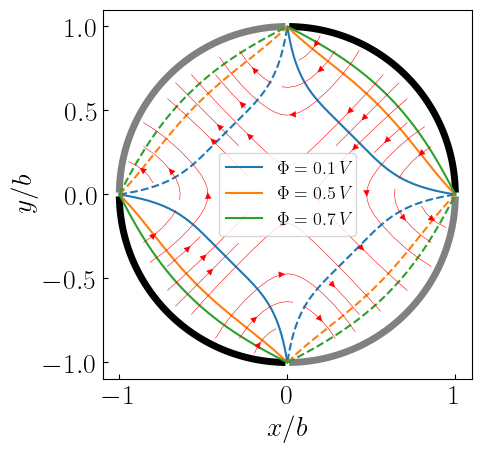

In [122]:
gap = 0.02
phi = np.linspace(gap*np.pi/2,(1-gap)*np.pi/2)
for i in range(4):
    color = 'k' if i % 2 == 0 else 'gray'
    plt.plot(np.cos(phi),np.sin(phi),color=color,lw=5)
    phi += np.pi/2

colors = ['C0','C1','C2']
for i in range(3):
    r = [0.1,0.5,0.7][i]
    color = colors[i]
    x,y = get_lcurve(r)
    plt.plot(x[x<0],y[x<0],color,label=r'$\Phi = %.1f \, V$'%r)
    plt.plot(x[x>0],y[x>0],color)

    x,y = get_lcurve(-r)
    plt.plot(x[x<0],y[x<0],color,ls='--')#,label=r'$\Phi = -%.1f \, V$'%r)
    plt.plot(x[x>0],y[x>0],color,ls='--')

t = np.linspace(-1,1)
X,Y = np.meshgrid(t,t)
Ex,Ey = get_E(X,Y)
R = np.sqrt(X**2 + Y**2)
cond = R>1#np.logical_or(R < 0.2,R > 1)
Ex[cond] = np.NaN
Ey[cond] = np.NaN
plt.streamplot(X,Y,Ex,Ey,density=0.5,linewidth=0.4,color='r')

    
plt.legend(fontsize=13,loc='center')#bbox_to_anchor=(1.0,0.5),loc='center left',frameon=False)
plt.xlabel(r'$x/b$',size=20)
plt.ylabel(r'$y/b$',size=20)
plt.tick_params(axis='both',which='major',direction='in',labelsize=20)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
ax = plt.gca()
ax.set_aspect('equal',adjustable='box')
plt.savefig('prob2c-1.pdf',bbox_inches='tight')

# Problem 3

In [29]:
a,V = sp.symbols('a V',real=True,positive=True)
gam = sp.symbols('\gamma_{nm}',real=True,positive=True)
A,B = sp.symbols('A B',real=True)

eq1 = sp.Eq(A+B,V)
eq2 = sp.Eq(A*sp.exp(gam*a)+B*sp.exp(-gam*a),V)
sol = sp.solve([eq1,eq2],[A,B])

A_ = sol[A]
B_ = sol[B]

In [35]:
display(A_)
display(B_)

V/(exp(\gamma_{nm}*a) + 1)

V*exp(\gamma_{nm}*a)/(exp(\gamma_{nm}*a) + 1)

In [44]:
n,m = sp.symbols('n m',integers=True,positive=True)

cosn = sp.cos(n*sp.pi*x/a)
cosm = sp.cos(m*sp.pi*x/a)
sinn = sp.sin(n*sp.pi*x/a)
sinm = sp.sin(m*sp.pi*x/a)

In [63]:
sp.integrate(sinn,(x,0,a)).simplify()

a*(1 - cos(pi*n))/(pi*n)

In [69]:
temp = sp.sinh(gam*x) - sp.sinh(gam*(x-a))
temp.rewrite(sp.cosh(gam*(x-a/2)))

sinh(\gamma_{nm}*x) - sinh(\gamma_{nm}*(-a + x))

In [98]:
16/np.pi**2/np.cosh(np.sqrt(2)*np.pi)

0.03813033415135046

In [117]:
def Phi_nm(x,y,z,n,m):
    gam = np.pi*np.sqrt((2*n+1)**2 + (2*m+1)**2)
    term = np.sin((2*n+1)*np.pi*x)*np.sin((2*m+1)*np.pi*y)*np.cosh(gam*(z - 0.5))
    term *= 1/np.cosh(gam/2)/(2*n+1)/(2*m+1)
    return 16/np.pi**2 * term 

def Phi(x,y,z,n_max,m_max):
    n = np.arange(0,n_max)
    m = np.arange(0,m_max)
    N,M = np.meshgrid(n,m)
    print(N.shape[0]*N.shape[1])
    term_nm = Phi_nm(x,y,z,N,M)
            
    return np.sum(term_nm)

In [120]:
results = []
for N in range(1,11):
    print(f'{Phi(0.5,0.5,0.5,N,N):.6f}')
    print()

1
0.347546

4
0.332958

9
0.333345

16
0.333333

25
0.333333

36
0.333333

49
0.333333

64
0.333333

81
0.333333

100
0.333333



# Problem 4

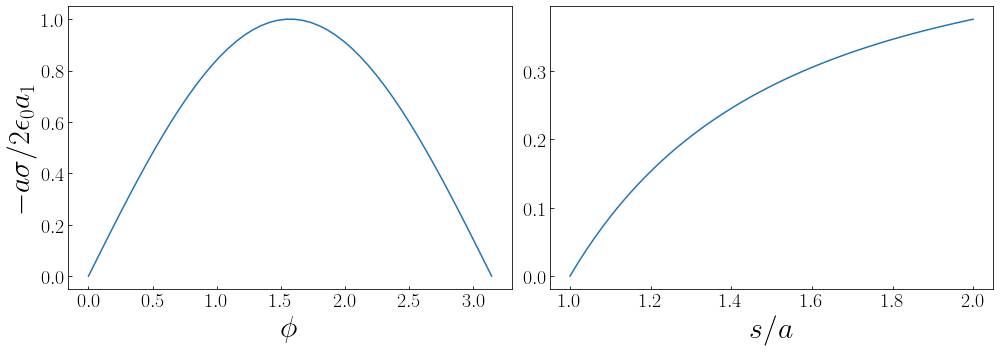

In [12]:
# y = np.linspace(0,1)
phi = np.linspace(0,np.pi)
t = np.linspace(1,2)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7*2,5))
# ax.plot(t1,0.5*(1-1/t1**2))
ax[0].plot(phi,np.sin(phi))
ax[1].plot(t2,0.5*(1-1/t2**2))

ax[0].set_xlabel(r'$\phi$',size=30)
ax[1].set_xlabel(r'$s/a$',size=30)
ax[0].set_ylabel(r'$-a \sigma/2 \epsilon_0 a_1$',size=30)

for i in range(2):
    ax[i].tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.tight_layout()
plt.show()
fig.savefig('prob4c.pdf',bbox_inches='tight')